Nettoyage

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
#load dataset
df = pd.read_csv("/content/penguins_size.csv")

File - penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

- species: penguin species (Chinstrap, Adélie, or Gentoo)
- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
- sex: penguin sex

These data are originally published in: 
Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_csv('nat2021.csv')

In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
df.drop_duplicates()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
print("Number of Nan per column \n")

for c in df.columns:
  print(c + ": " + str(df[c].isna().sum()))

Number of Nan per column 

species: 0
island: 0
culmen_length_mm: 2
culmen_depth_mm: 2
flipper_length_mm: 2
body_mass_g: 2
sex: 10


In [ ]:
df["sex"].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

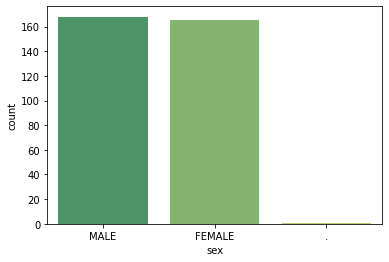

In [ ]:
import seaborn as sns
sns.countplot(data=df, x='sex', palette='summer');

In [ ]:
df.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

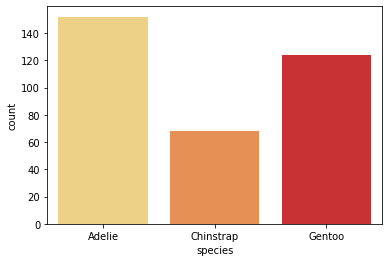

In [ ]:
sns.countplot(data=df, x='species', palette='YlOrRd');

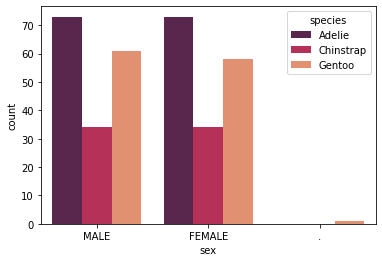

In [ ]:
sns.countplot(data= df, x='sex', palette='rocket', hue='species');

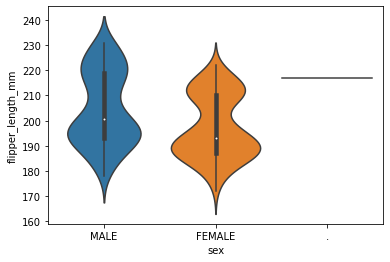

In [ ]:
ax = sns.violinplot(x= 'sex', y= 'flipper_length_mm', data=df, size=8)

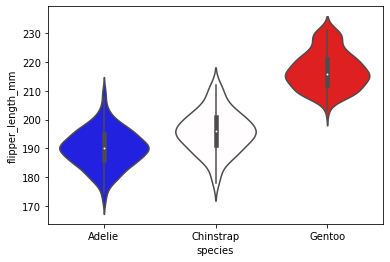

In [ ]:
ax = sns.violinplot(x= 'species', y= 'flipper_length_mm', data=df, size=8, palette='seismic')

In [ ]:
indexNames = df[ df['sex'] == '.' ].index
df.drop(indexNames , inplace=True)

In [ ]:
df.dropna(subset= ["sex"], inplace= True)
print(str(df[c].isna().sum()))

0


In [ ]:
for c in df.columns:
  if df[c].isna().sum() != 0:
    mean = df[c].mean()
    df[c] = df[c].fillna(mean)
    print(c + ": " + str(df[c].isna().sum()))

**ML / étude des données**

In [ ]:
df["species"].replace(["Adelie", "Gentoo", "Chinstrap"], [1, 2, 3], inplace= True)
df["sex"].replace(["MALE", "FEMALE"], [1, 2], inplace= True)

In [ ]:
target = df["species"]
data = df.drop(["island", "species", "sex"], axis= 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, stratify=target, random_state=42)

In [ ]:
from sklearn.preprocessing import Normalizer

scaler= Normalizer().fit(X_train)
normalized_x_train= scaler.transform(X_train)
normalized_x_test= scaler.transform(X_test)

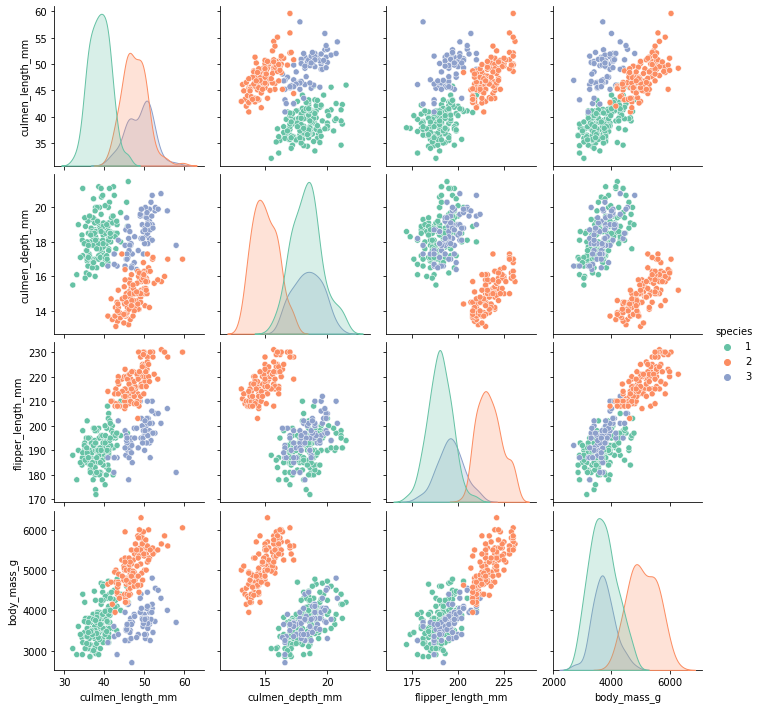

In [ ]:
import seaborn as sns

plot = sns.pairplot(df.drop(["island", "sex"], axis= 1), hue= "species", palette = sns.color_palette("Set2", 3))

**Decision tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
print('Accuracy on the training subset: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on the training subset: 0.968
Accuracy on the test subset: 0.940


In [ ]:
for i in range(1, 11):
  tree = DecisionTreeClassifier(max_depth= i, random_state= 0)
  tree.fit(X_train, y_train)
  print(i)
  print('Accuracy on the training subset: {:.3f}'.format(tree.score(X_train, y_train)))
  print('Accuracy on the test subset: {:.3f}'.format(tree.score(X_test, y_test)))

1
Accuracy on the training subset: 0.783
Accuracy on the test subset: 0.786
2
Accuracy on the training subset: 0.960
Accuracy on the test subset: 0.917
3
Accuracy on the training subset: 0.968
Accuracy on the test subset: 0.940
4
Accuracy on the training subset: 0.992
Accuracy on the test subset: 0.964
5
Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.976
6
Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.976
7
Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.976
8
Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.976
9
Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.976
10
Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.976


In [ ]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='pingoo.dot', class_names=["Adelie", "Gentoo", "Chinstrap"], feature_names= data.columns,
               impurity=False, filled=True)

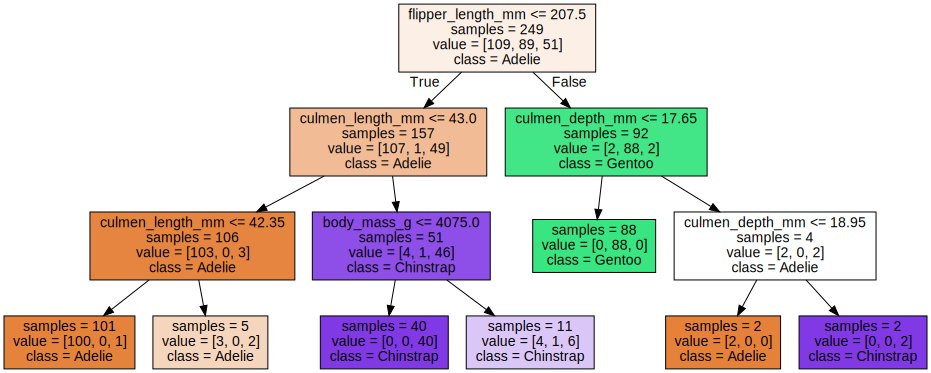

In [ ]:
from IPython.display import display

with open("pingoo.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

In [ ]:
print("Feature importances: {}".format(tree.feature_importances_))

Feature importances: [0.37193947 0.05212726 0.55576266 0.02017061]


Most important feature : flipper

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
print('Accuracy of KNN, on the training set: {:.3f}'.format(knn.score(X_train, y_train)))
print('Accuracy of KNN, on the test set: {:.3f}'.format(knn.score(X_test, y_test)))

Accuracy of KNN, on the training set: 0.900
Accuracy of KNN, on the test set: 0.726


In [ ]:
for i in range(1, 31):
  knn = KNeighborsClassifier(n_neighbors= i)
  knn.fit(X_train, y_train)
  print(i)
  print('Accuracy of KNN, on the training set: {:.3f}'.format(knn.score(X_train, y_train)))
  print('Accuracy of KNN, on the test set: {:.3f}'.format(knn.score(X_test, y_test)))

1
Accuracy of KNN, on the training set: 1.000
Accuracy of KNN, on the test set: 0.845
2
Accuracy of KNN, on the training set: 0.900
Accuracy of KNN, on the test set: 0.726
3
Accuracy of KNN, on the training set: 0.876
Accuracy of KNN, on the test set: 0.714
4
Accuracy of KNN, on the training set: 0.851
Accuracy of KNN, on the test set: 0.738
5
Accuracy of KNN, on the training set: 0.855
Accuracy of KNN, on the test set: 0.798
6
Accuracy of KNN, on the training set: 0.855
Accuracy of KNN, on the test set: 0.774
7
Accuracy of KNN, on the training set: 0.819
Accuracy of KNN, on the test set: 0.774
8
Accuracy of KNN, on the training set: 0.787
Accuracy of KNN, on the test set: 0.786
9
Accuracy of KNN, on the training set: 0.787
Accuracy of KNN, on the test set: 0.798
10
Accuracy of KNN, on the training set: 0.791
Accuracy of KNN, on the test set: 0.786
11
Accuracy of KNN, on the training set: 0.803
Accuracy of KNN, on the test set: 0.798
12
Accuracy of KNN, on the training set: 0.783
Accur

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
models=[]

models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('rfc', RandomForestClassifier()))

In [ ]:
# evaluate each model

results =[]
names=[]
for name , model in models:
    kfold=KFold(n_splits=10, random_state=40, shuffle=True)
    cv_results= cross_val_score(model, X_train, y_train, cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    
    msg= '%s:, %f, (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN:, 0.783167, (0.054070)
NB:, 0.967833, (0.039229)
SVM:, 0.727000, (0.075107)
rfc:, 0.967667, (0.061717)
